In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.append('../../')
from pocs.utils import hdr

In [2]:
from astropy import units as u
from astropy import constants as c

In [5]:
#Creating an imager array object
imager_array = hdr.create_imager_array()

In [6]:
#Generating a list of exposure times for the imager array
imager_array.exposure_time_array(minimum_magnitude=10*u.ABmag, maximum_magnitude=22*u.ABmag, factor=2, maximum_exptime = 300 * u.second)

[<Quantity 2.34 s>,
 <Quantity 4.69 s>,
 <Quantity 9.38 s>,
 <Quantity 18.75 s>,
 <Quantity 37.5 s>,
 <Quantity 75.0 s>,
 <Quantity 150.0 s>,
 <Quantity 300.0 s>,
 <Quantity 300.0 s>,
 <Quantity 300.0 s>]

In [7]:
#calculates the total exposure time and total elapsed time for a set of exposure times 
imager_array.total_time_calculation(minimum_magnitude=10*u.ABmag, maximum_magnitude=22*u.ABmag, factor=2, maximum_exptime = 300 * u.second)

(<Quantity 1197.6599999999999 s>, <Quantity 1297.6599999999999 s>)

In [9]:
#calculates the saturation limits corresponding to a set of exposure times
imager_array.saturation_limits(minimum_magnitude=10*u.ABmag, maximum_magnitude=22*u.ABmag, factor=2, maximum_exptime = 300 * u.second)

[<Quantity 9.505774782560115 mag(AB)>,
 <Quantity 10.260766788387452 mag(AB)>,
 <Quantity 11.013540466377965 mag(AB)>,
 <Quantity 11.76593361352634 mag(AB)>,
 <Quantity 12.519303588600895 mag(AB)>,
 <Quantity 13.273470298011755 mag(AB)>,
 <Quantity 14.029235745346881 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>]

(<Magnitude [  9.50577478,  9.51577478,  9.52577478,...,  24.32577478,
              24.33577478, 24.34577478] mag(AB)>,
 <Quantity [ 630.4644303 , 627.53539076, 624.61966479,...,    0.76450422,
               0.75750356,   0.75056693]>)

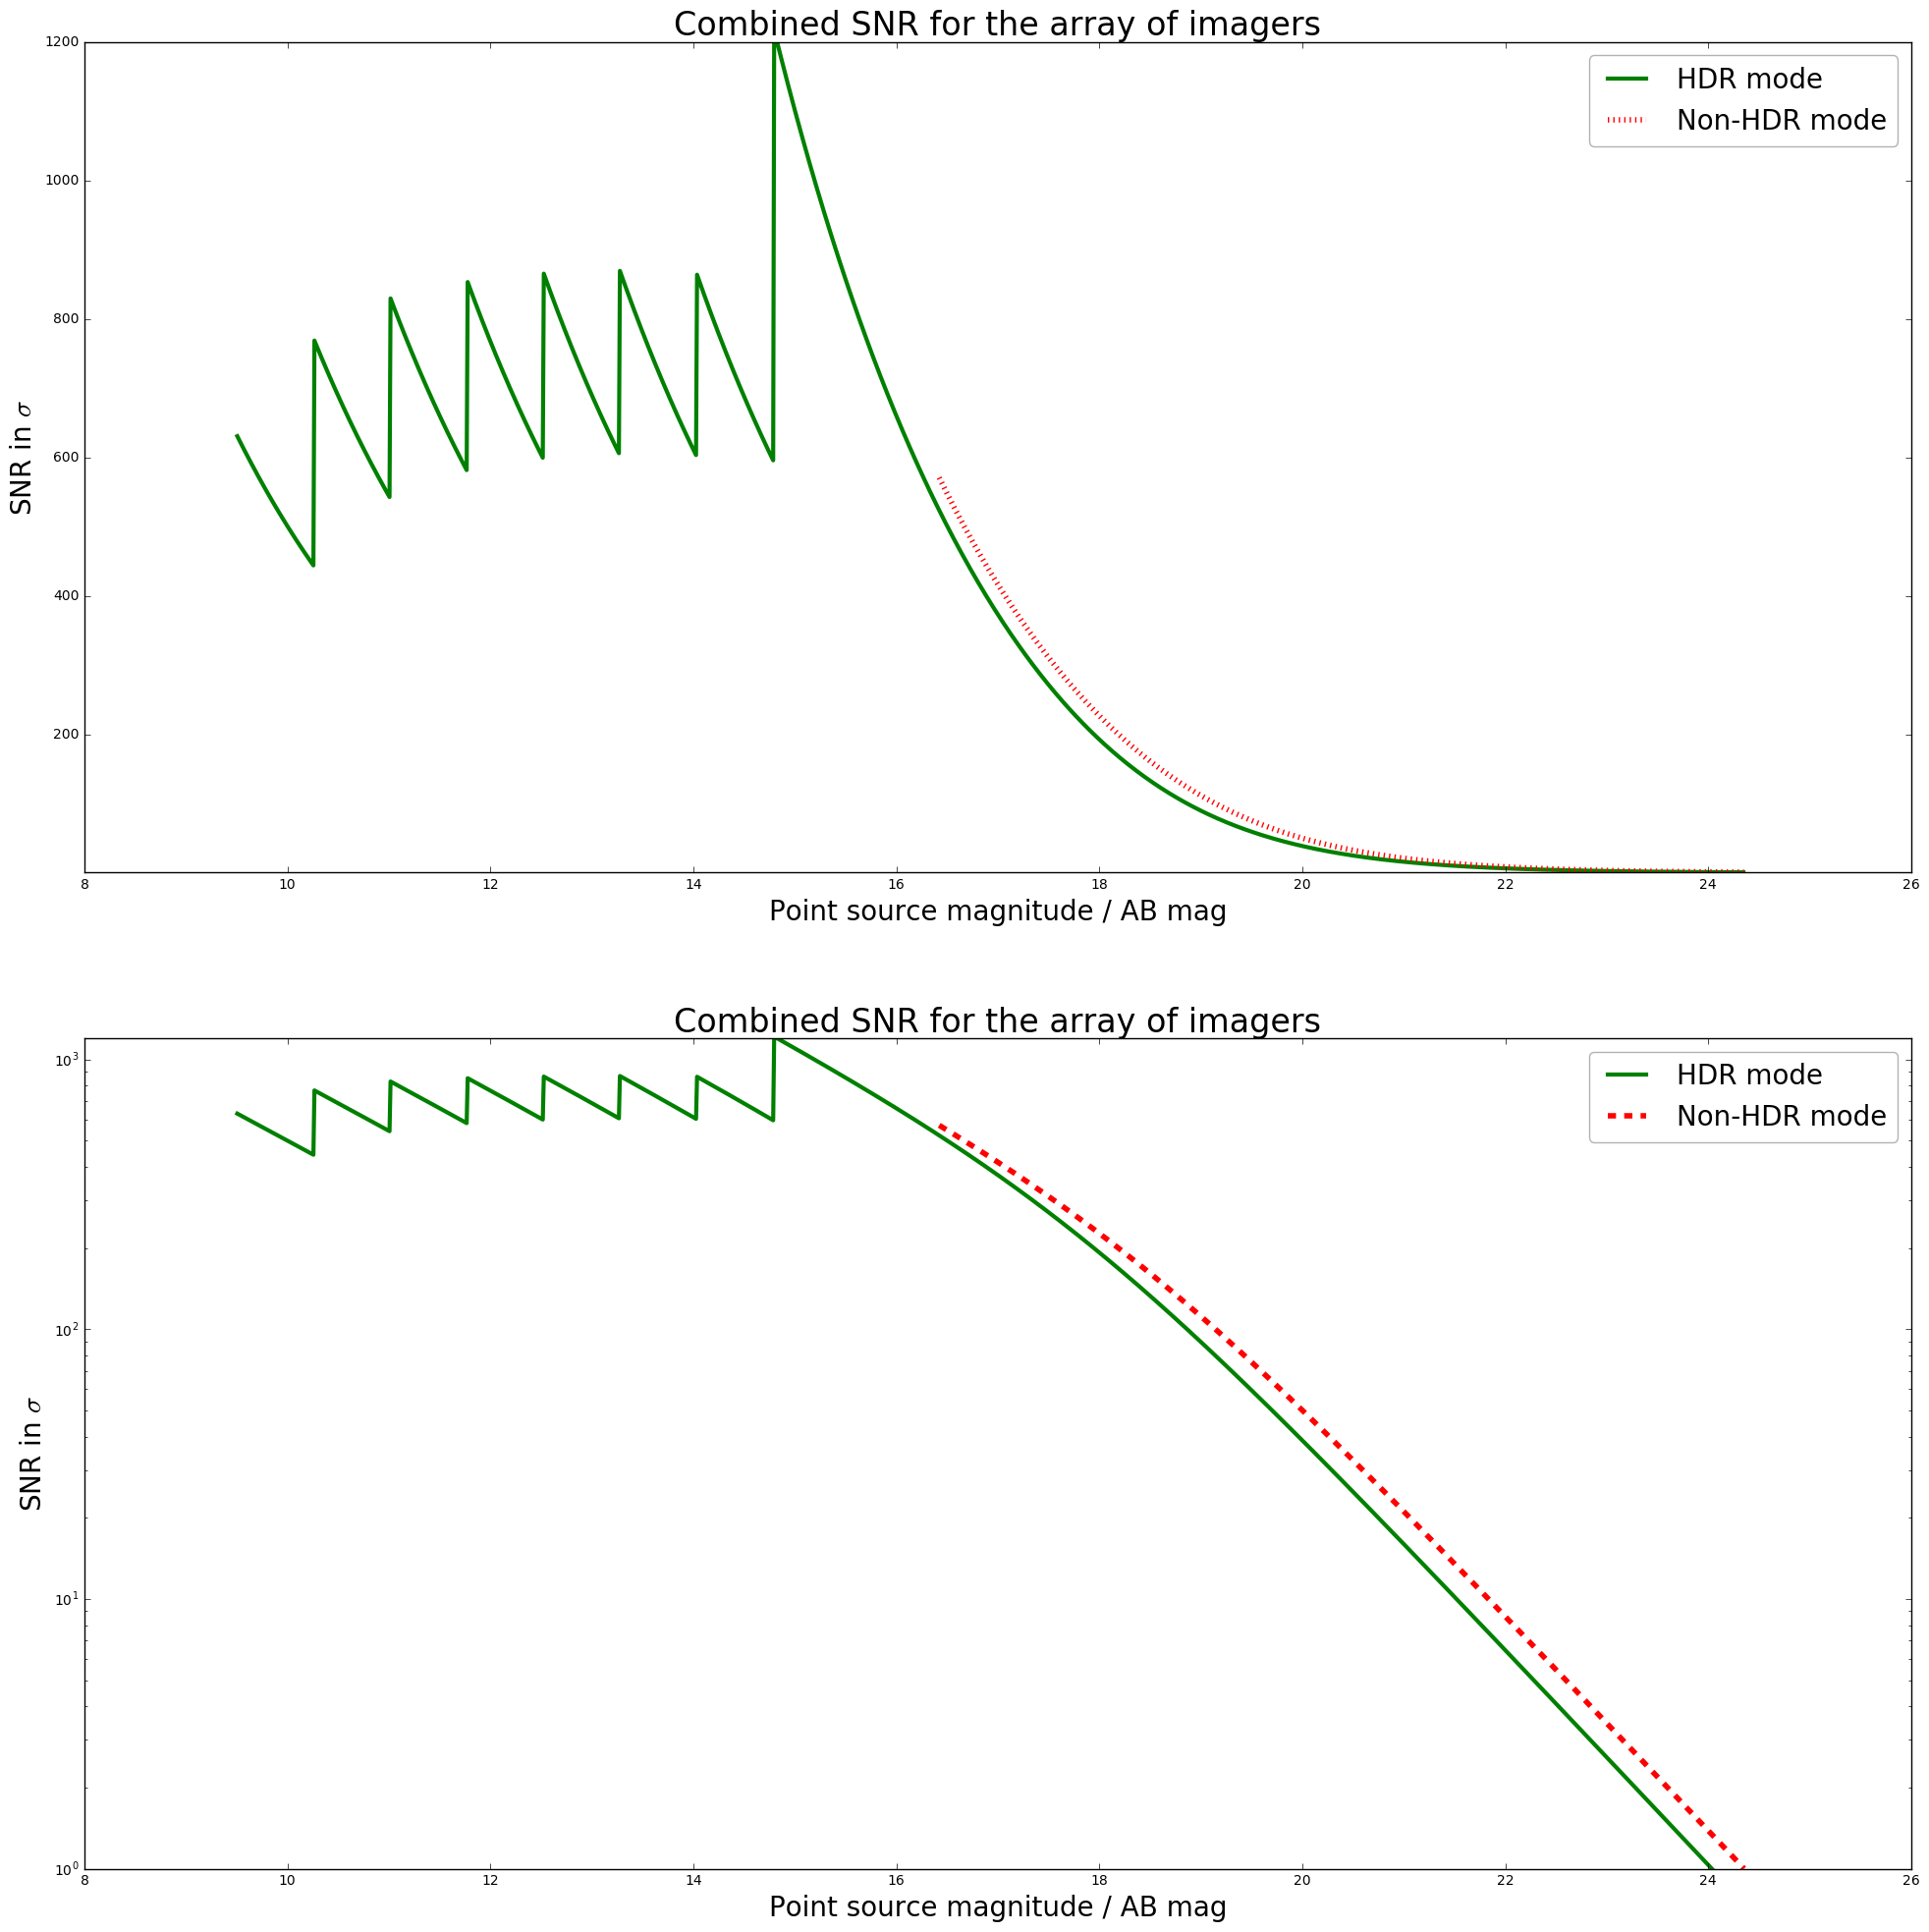

In [15]:
#Generates a plot of SNR versus magnitude for a point source for a HDR mode against a non-HDR mode
%matplotlib inline
imager_array.snr_plot(minimum_magnitude=10*u.ABmag, maximum_magnitude=22*u.ABmag, factor=2, maximum_exptime = 300 * u.second, generate_plots = True)

([<Quantity 2.34 s>,
  <Quantity 4.69 s>,
  <Quantity 9.38 s>,
  <Quantity 18.75 s>,
  <Quantity 37.5 s>,
  <Quantity 75.0 s>,
  <Quantity 150.0 s>,
  <Quantity 300.0 s>,
  <Quantity 300.0 s>,
  <Quantity 300.0 s>],
 [<Quantity 9.505774782560115 mag(AB)>,
  <Quantity 10.260766788387452 mag(AB)>,
  <Quantity 11.013540466377965 mag(AB)>,
  <Quantity 11.76593361352634 mag(AB)>,
  <Quantity 12.519303588600895 mag(AB)>,
  <Quantity 13.273470298011755 mag(AB)>,
  <Quantity 14.029235745346881 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>],
 (<Quantity 1197.6599999999999 s>, <Quantity 1297.6599999999999 s>),
 (<Magnitude [  9.50577478,  9.51577478,  9.52577478,...,  24.32577478,
               24.33577478, 24.34577478] mag(AB)>,
  <Quantity [ 630.4644303 , 627.53539076, 624.61966479,...,    0.76450422,
                0.75750356,   0.75056693]>))

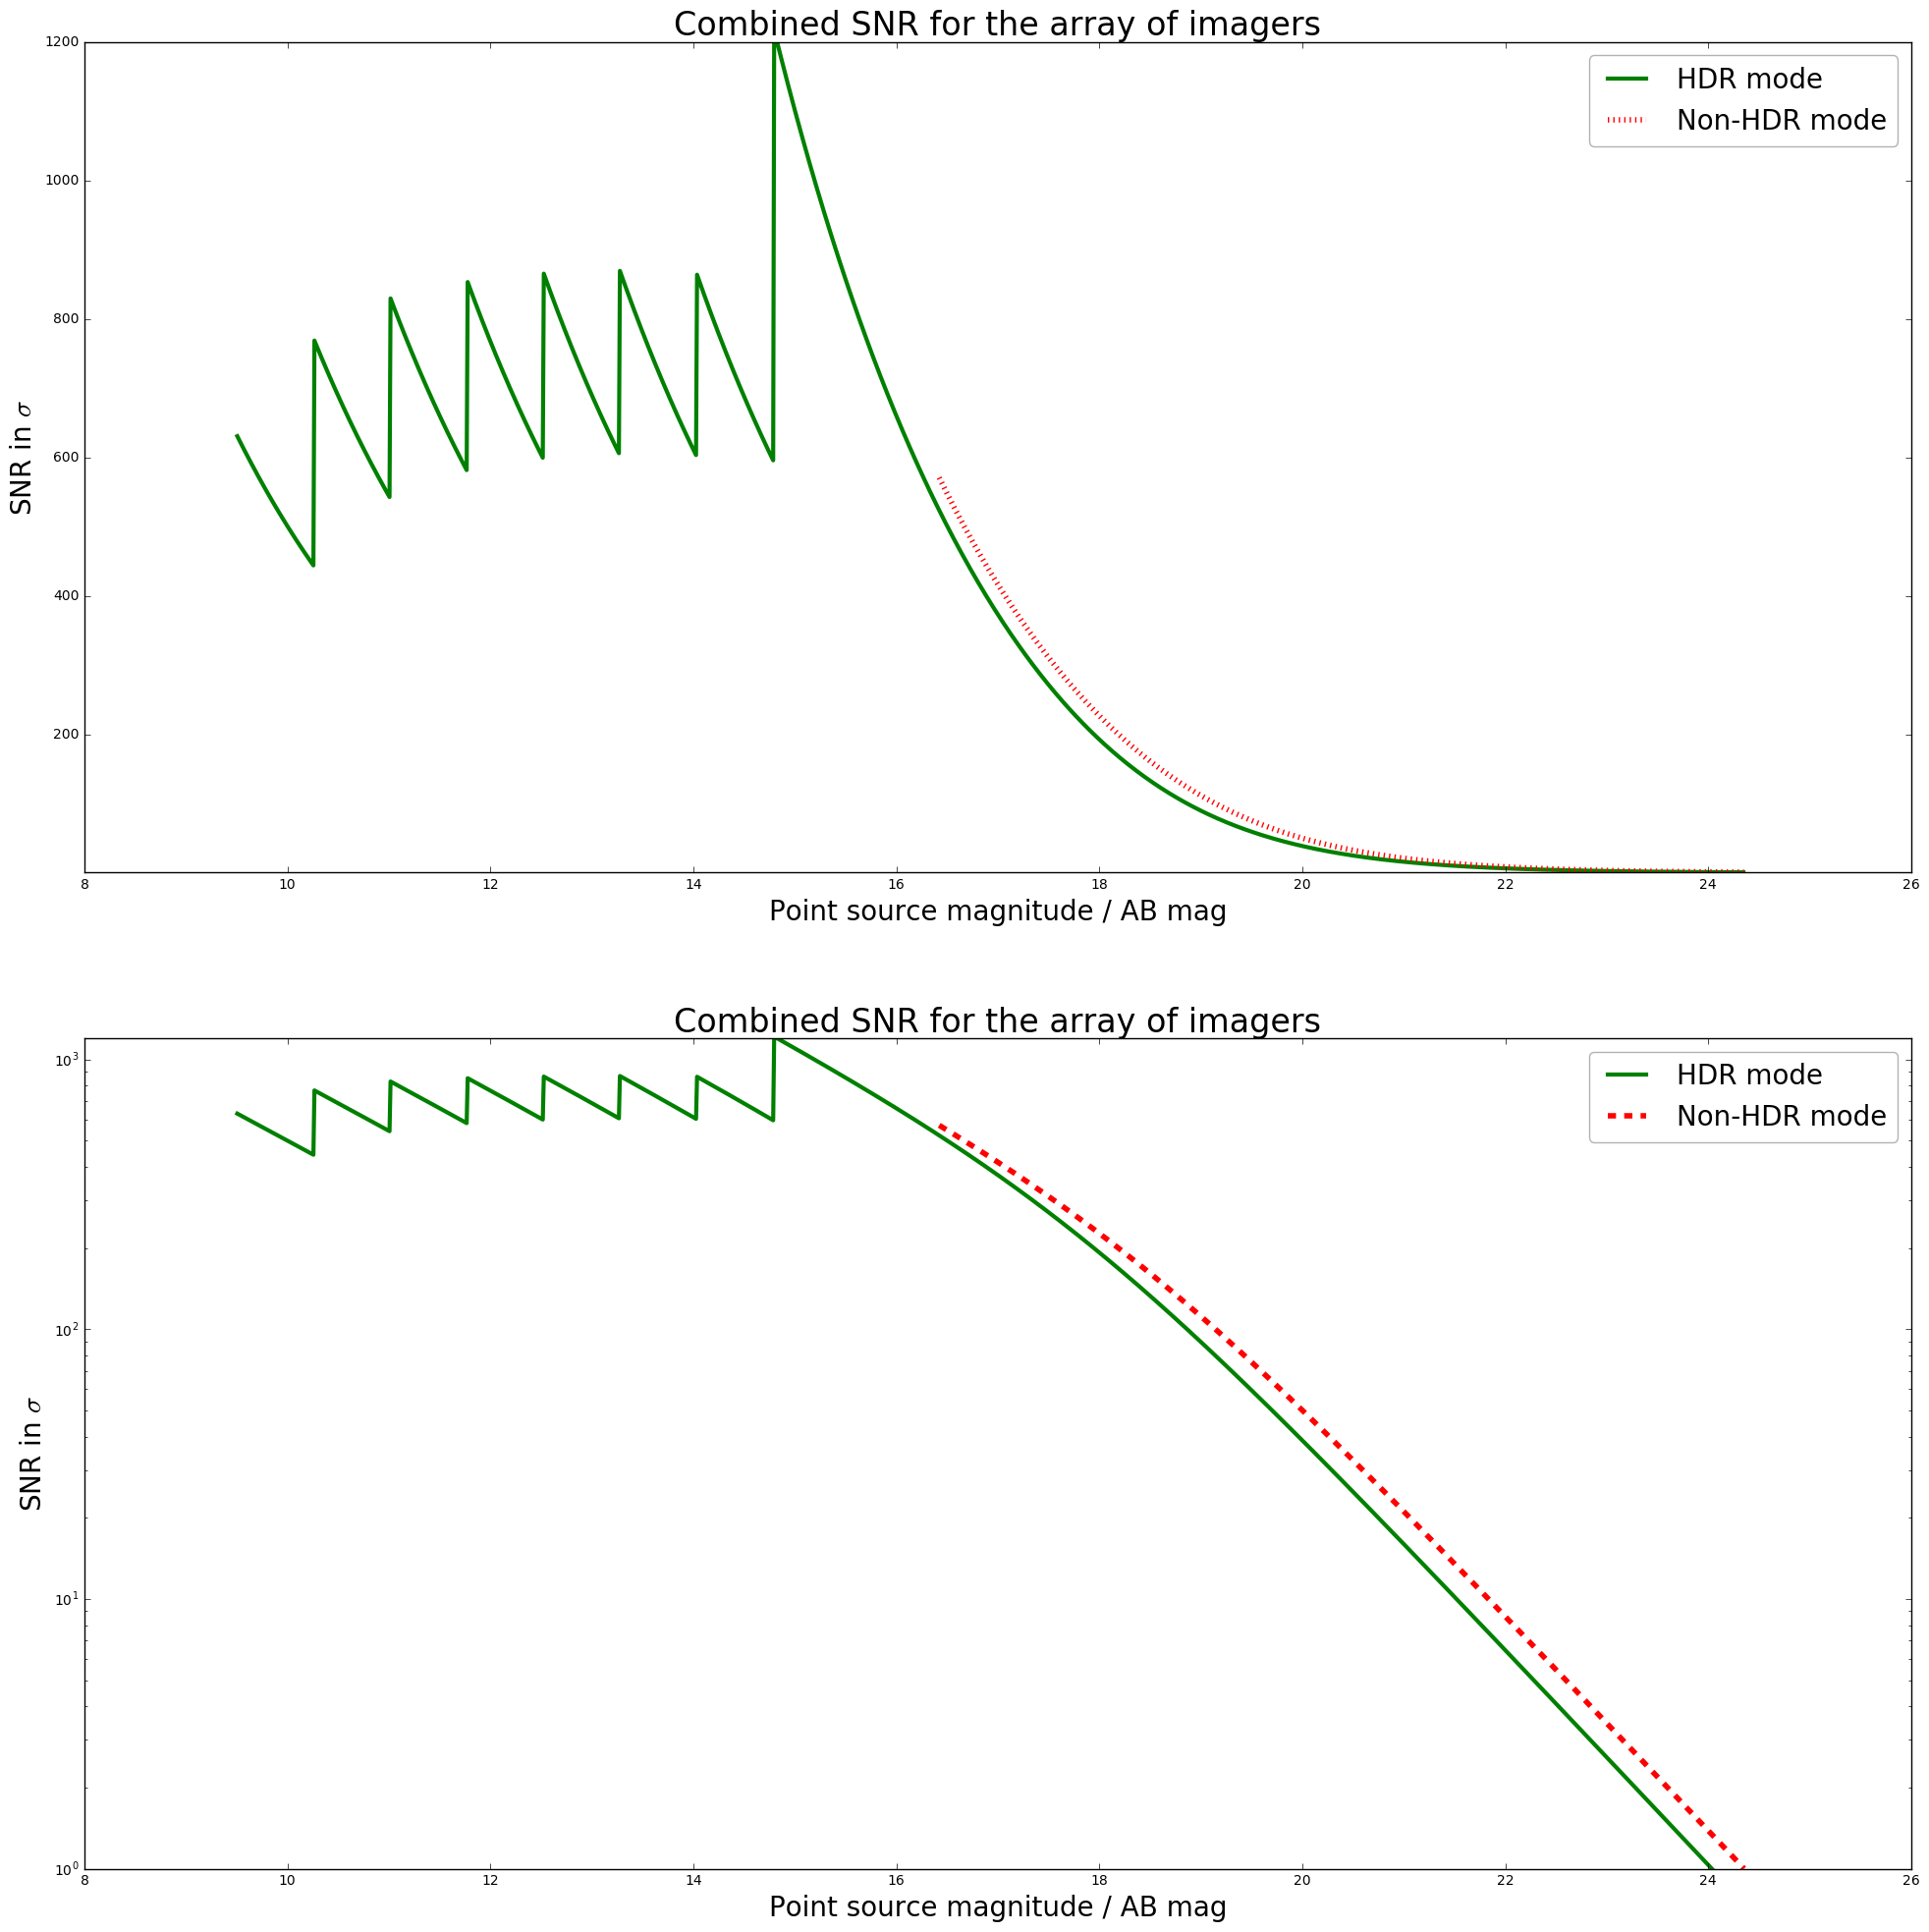

In [16]:
#generates all the information required for an HDR mode
imager_array.HDR_mode(minimum_magnitude=10*u.ABmag, maximum_magnitude=22*u.ABmag, factor=2, maximum_exptime = 300 * u.second, generate_plots = True)

In [17]:
#generates a list of dictionaries with each dictionary containing a different target position
from astropy.coordinates import SkyCoord
ra='13 37 00'
dec='-29 51 56.74'
ra_dec1=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg), equinox='J2000', obstime='2014.58')
offset=0.5*u.deg
target_list = hdr.HDR_target_list(ra_dec1, 'betelgeuse', 10*u.ABmag, 22*u.ABmag)
print (target_list)

[{'name': 'betelgeuse', 'frame': 'icrs', 'visit': {'primary_nexp': 1, 'primary_exptime': 2.34}, 'position': '13h37m00s -29d51m56.74s', 'priority': 100, 'equinox': 'J2000', 'epoch': '2014.58'}, {'name': 'betelgeuse', 'frame': 'icrs', 'visit': {'primary_nexp': 1, 'primary_exptime': 4.69}, 'position': '13h38m24.8528s -29d30m43.9478s', 'priority': 100, 'equinox': 'J2000', 'epoch': '2014.58'}, {'name': 'betelgeuse', 'frame': 'icrs', 'visit': {'primary_nexp': 1, 'primary_exptime': 9.38}, 'position': '13h38m24.8528s -29d51m56.74s', 'priority': 100, 'equinox': 'J2000', 'epoch': '2014.58'}, {'name': 'betelgeuse', 'frame': 'icrs', 'visit': {'primary_nexp': 1, 'primary_exptime': 18.75}, 'position': '13h38m24.8528s -30d13m09.5322s', 'priority': 100, 'equinox': 'J2000', 'epoch': '2014.58'}, {'name': 'betelgeuse', 'frame': 'icrs', 'visit': {'primary_nexp': 1, 'primary_exptime': 37.5}, 'position': '13h37m00s -30d13m09.5322s', 'priority': 100, 'equinox': 'J2000', 'epoch': '2014.58'}, {'name': 'betelge